# Time Series Analysis and the Fourier Transform

## Contents
1. Introduction
    * 1.1 - General Trend
    * 1.2 - Seasonality
    * 1.3 - Autocorrelation
2. Fourier Transform
    * 2.1 - How does it work?
    * 2.2 - Why is it useful?
3. Use case: Time Series Classification
4. Toolbox Developlement
5. References


## Package Imports

In [57]:
import numpy as np
from numpy import sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from utils import load_data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [ ]:
def powerspectrum(X):
    Xt = np.fft.fft(X)
    return np.abs(Xt) ** 2

## 1. Introduction
A Time Series is a set of data collected over a period of time at equal intervals, which is often plotted onto a line graph.

In [12]:
figure(num=None, figsize=(32, 18), dpi=80, facecolor='w', edgecolor='k')

<Figure size 2560x1440 with 0 Axes>

<Figure size 2560x1440 with 0 Axes>

In [13]:
vol = .030
lag = 300
df = pd.DataFrame(np.random.randn(100000) * sqrt(vol) * sqrt(1 / 252.)).cumsum()

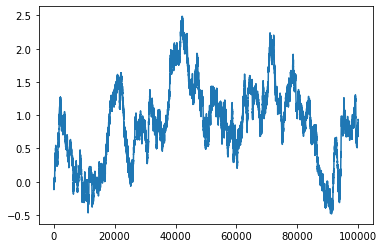

In [14]:
plt.plot(df[0].tolist())
plt.show()

This is an example on a single univariate time series, whereas in some cases it may be more useful to have a multivariate time series, multiple time series or a combination of the two. An example of needing a multivariate time series, is when you are observing the effect of multiple variable on an observation, such as how a patient's diet, lifestyle and exercise could affect their physical health. An example of a usage of multiple time series could be if you're trying to train or optimise an algorithm by looking at multiple time series. For instance, by trying to detect the symptoms of faults in the engine by sampling engine noise.

From the above graph, there are various aspects to be indentified that can tell us certain characteristics about the data, such as:

* Its General Trend
* Its Seasonality
* The autocorrelation between observations


An important aspect of time series is the statistical independence of values. This refers to the fact that all future values of a time series depend on previous values. So, eventhough Time Series data can be used to make estimates of values within the time period of the observations, Time Series data is most useful when used to extrapolate and predict future values - that of which can be done by analysing the data and aforementioned features of the data.

### 1.1 - General Trend
The General trend of a Time Series refers to the overall change that occurs in the data within the observed time period. For instance, the overall decrease in the manufactute sales volume of icecream in the UK between 2009 and 2018. The general trend of the data usually does not take into account fluctuations between the set time period. 

<img src="images/Ice Cream Sales.png" width="600">

To visualise the general trend of the data, a trend line (which models the data as a polynormial) can be drawn to by calculating the moving average of each cycle and drawing the best fit line for each point. This trend line could also be used to make estimates and predictions, however this approach is quite ignorant as it suggests that the next observation is the mean of the past observations.

There are other options for modelling the data such as exponential smoothing*
, which gives a decreasing weight to data that was collected further from the present, or Seasonal Autoregressive integraded moving averag model (SARIMA)*
, which combines a collection of simple models to create a more complex model that better represents the data.

*
*More info about exponential modelling and SARIMA can be found in the references section*

### 1.2 - Seasonality
Seasonality refers to the seasonal fluctuations in the data. For example, a large increase of ice-cream sales within the summer months and a large dip in sales during winter. 

<img src="images/Texas Employment.png" width="600">


You can measure the seasonality by calculating the seasonal effect of the data using:

**Seasonal Effect = Real Value - Value from Trend Line**

By calculating the average seasonal effect for each point/season in each cycle, you can make predictions for the future values using extrapolations. However, there are clear limitations to doing so, such as how random events or other variables could alter the seasonality of the time series. An example of this could be that after a gradual increase of global tempertures there were also increases to the sales of ice-cream during early autumn or late spring. If variables, such as these, are not taken into account, then these predictions become less accurate the further into the future these prediction are made.
 
### 1.3 - Autocorrelation

Autocorrelation refers to how similar observation are between a fixed lag time. 

<img src="images/autocorrelation.png" width="600">

As you can see from the graph, the 1st value and the 24th value are very similar/ highly correlated. This is also apparent for the 12th value and the 36th value. This shows suggests that we can expect to find similar values every 25 units of time. This could help hint towards the seasonal fluctions in the data.

Additionally, the fact that correlationf between current and previous observations can be found, further emphasises the statisical inpendence of values in Time Series data, showing that previous values do have an effect on future values. 

## 2. Fourier transform
The Fourier transform is used to tranform a function of time into a function of frequency. This is denoted in the equation:

$$\hat{f}(\xi) = \int_{-\infty}^{\infty} f(x) e^{-2\pi ixξ} dx,$$
for any real number $ξ$.


where $x$ represents *time*, the transform variable $ξ$ represents *frequency*. $f$ can determined $\hat{f}$ by using the inverse transform:

$$f(x) = \int_{-\infty}^{\infty} \hat{f}(ξ) e^{2\pi ixξ} dx,$$
for any real number $x$.

Despite changing the type of information being held, each function $f$ and $\hat{f}$ represent the same data. Such as how both the IP address and URL can represent the same web page.


### 2.1 - How does it work?
Any continuous signal in the time domain can be represented as represented as the sum of simple sine curves. Since these can be described using only their amplitude, frequency and phase, you can plot the frequency domain representation of the signal by plotting changes in amplitude and phase at given frequencies.

Take this sine wave as an example.
Original: y = sin(15x) and y = sin(7x)

In [15]:
x = np.arange(0, 4*np.pi, 0.1)
y1 = np.sin(15*x)
y2 = np.sin(7*x)

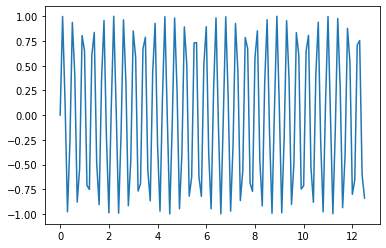

In [16]:
plt.plot(x,y1)
plt.show()

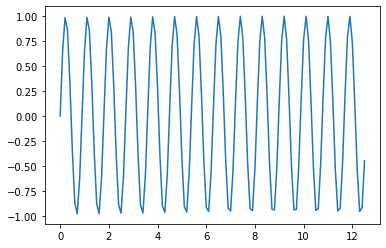

In [17]:
plt.plot(x,y2)
plt.show()

Fourier Transformed Sine Curves:

In [18]:
sp1 = np.fft.fft(y1)
sp2 = np.fft.fft(y2)
freq = np.fft.fftfreq(x.shape[-1])

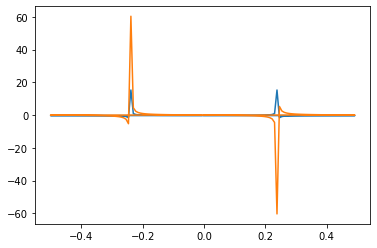

In [19]:
plt.plot(freq, sp1.real, freq, sp1.imag)
plt.show()

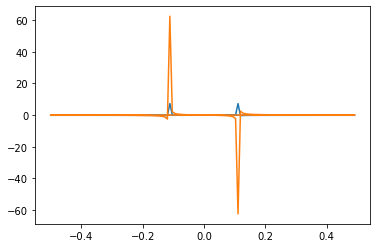

In [20]:
plt.plot(freq, sp2.real, freq, sp2.imag)
plt.show()

When we performed the fourier transform on this wave, we see a "spikes" form at certain frequencies. These frequencies correspond to the frequency of the original sine wave that was tranformed. You could also revert it back using the inverse function.

Additionally, when we superimpose multiple of these waveforms, the waves can interfere constructively or destructively. This alters the shape of these waves. However, when we then apply the fourier transform to these impure waveforms, the frequencies of their constituent waveforms still form peaks in the new function.

New: y = sin(15x) + sin(7x)

In [21]:
a = np.arange(0, 4*np.pi, 0.1)
b = np.sin(15*x)+np.sin(7*x)

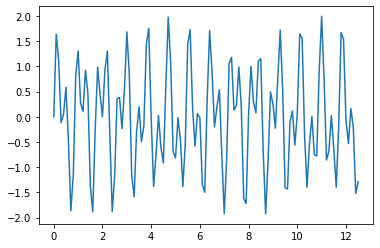

In [22]:
plt.plot(a,b)
plt.show()

In [23]:
impure_sp = np.fft.fft(b)
impure_freq = np.fft.fftfreq(x.shape[-1])

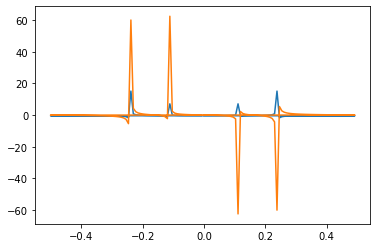

In [24]:
plt.plot(impure_freq, impure_sp.real, impure_freq, impure_sp.imag)
plt.show()



### 2.2 - Why is this useful?
This tranform is very useful as it allows us to decompose impure waveforms. This allows for many different application and usages for this transform as a result when used in conjunction with the inverse transform. A few examples being:

* in sound editing, a high frequency within an audio file can be easily identified and altered after transforming the sound wave using the fourier transform, 

* in forsensics, a periodic background image behind a fingerprint could be easily removed after performing a fourier transform in order to create a more focused image.

There is also another application of the fourier transform involving the usage of engine sounds(mentioned earlier) that I will go into much greater detail below.

## 3. Use case: time series classification
* discuss application of Fourier transform 
* explain time series classification
 

By transforming the audio files of engine sounds, it could be possible to diagnose whether the symptoms of engine problems exist within certain cars, by identifying the presence of certain frequencies that suggest said symptoms could be present. 

That was one of the problem used in the IEEE World Congress on Computational Intelligence competition in 2008. While () , it is important to understand what a classification problem is and, specifically, what time series classification is?

### Classification

Variables can be described as either qualitative or quantitative, meaning they can be expressed numerically or categorically respectively. A person's height and age are simple examples of quantitative data, whilst somebody's sex or favourite colour would be qualitative data. 

It is important to distinguish between these two types of data as it changes how we approach the problems that involve these data. Regression problems *usually* involve quantitative data and classification problems *usually* refer to problems involving qualitative data. In our particular use case, we want to focus on classification as we are aiming to categorise certain data.


### Problem statement: time series classification
* what is the problem we are trying to solve, time series classification
* binary classification
* what's the difference between standard (or tabular) classification and time series classification
* we have multiple (independent) univariate time series and for each one we have a label (or category), namely whether or not it's a fault

Time Series Classification involves grouping certain time series' based on their behaviour over time. For example, trying to group the time series of heart rates of athletes, from pre-workout to post-workout, into male and female athletes. Men usually tend to have lower resting heart rates but higher peak heart rates during exercise, this would result in a noticeable difference in the shape of the time series of men compare to women. A suitable algorithm such as k-Nearest Neighbours or the Random Forest(RF) classification algorithm could classify these time series.

While both Standard Classification(SC) and Time Series Classification(TSC) involve the grouping of observations between 2 variables, TSC specifically involves changes over time. As a result, entire time series are required to represent single observations in TS. Compared to SC, where only single plots are needed to represent a single observation.

Specifically, This problem is a binary classification problem, involving multiple independent univariate time series. This means that each time series shows the change in a single variable over time; the aim is to group the time series into two distinct categories.

### Data set: FordA
* fault detection based on engine noise
* FordA data set: http://timeseriesclassification.com/description.php?Dataset=FordA
* 4921 (independent) time series, for each time series we observe 500 time points, 4921 labels (ground truth)

The case consists of 500 measurements of engine noise in 4921 independent engines as well as a corresponding classification. The train and test dataset  for FordA was collected in typical operating conditions, with minimal noise contamination.

In [26]:
X, y = load_data()

In [27]:
print(X.shape, y.shape)

(4921, 500) (4921,)


In [28]:
unique_values, counts = np.unique(y, return_counts=True)
print(unique_values, counts)

['-1' '1'] [2527 2394]


<BarContainer object of 2 artists>

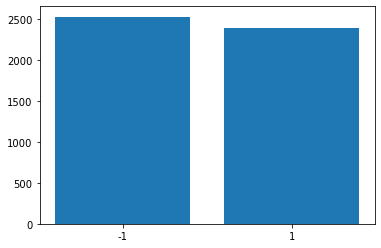

In [29]:
plt.bar(unique_values, counts)

In [34]:
y_train

array(['-1', '1', '1', ..., '1', '1', '1'], dtype='<U2')

* add legend

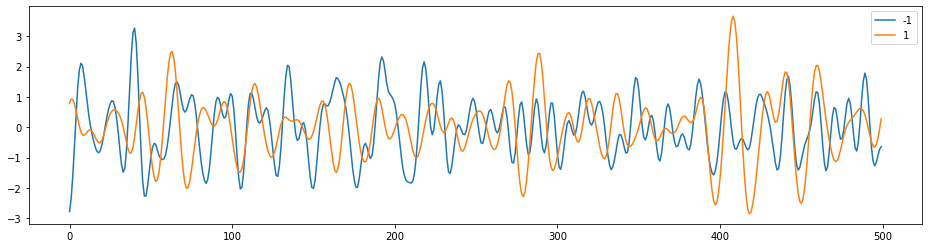

In [35]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.25))
ax.plot(np.arange(X_train.shape[1]), X_train[0,:], label="-1")
ax.plot(np.arange(X_train.shape[1]), X_train[2,:], label="1")
plt.legend()

### Methodology
* why do we split the data into a training and a test set
* briefly describe random forest (RF) classification algorithm: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* how do we want to solve it, i.e. using the Fourier transform
* quantify performance using binary classification metrics: https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers
* accuracy is a good choice, mention importance of the data being balanced

#### general idea 
compare two approaches to highlight the usefulness of the FT
1. try to classify the data with RF
2. try to classify the data using DFT and RF

#### supervised learning workflow
1. specify your model/algorithm (in this case RF)
2. fit the model to the data
3. you generate predictions from the fitted model
4. you compare predictions against "true" values (accuracy) 

In order to compare the effectiveness of the Fourier Transform for classifying Time Series data, we are going to use it in addition with the Random Forest Classification (RFC) Algorithm to classify the FordA data set. This time series data will then be split into training and testing data. The training data is used to train the algorithm by teaching it how certain classes behave over time whilst the testing data is new data, that is unseen by the algorithm. Once the data has been split, the training data is then fit to the classifier - this is where we train the algorithm to understand the characteristics that distinguish between the faulty and non-faulty engine groups. Afterwards, the 

The RFC Algorithm works by 

An overview of the Methodology:

1. Split the data into training data and test data
2. Fit the training data to the classifier
3. Generate predictions of the test data using the fitted model
4. Compare the data against the actual values
5. Repeat Steps 2 - 4 with Fourier Transformed Training Data
6. Compare accuracy differences



In [ ]:
#Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
#Dimensions of the training and test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3690, 500) (1231, 500) (3690,) (1231,)


In [38]:
#Fit the training data to the Classifier
classifier_No_FT = RandomForestClassifier()
classifier_No_FT.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
#Predict the classes of the test data using the fitted model
y_pred = classifier_No_FT.predict(X_test)

In [53]:
#Apply Fourier Transform to the Training and Test Data
X_train_ps = powerspectrum(X_train)
X_test_ps = powerspectrum(X_test)

In [43]:
#Fit the training data to the Classifier
classifier_FT = RandomForestClassifier()
classifier_FT.fit(X_train_ps, y_train)

In [45]:
#Predict the classes of the test data using the fitted model
y_pred_ps = classifier_FT.predict(X_test_ps)

### Results
* discuss results
* visualise results

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test, y_pred)

0.7327376116978067

In [48]:
accuracy_score(y_test, y_pred_ps)

0.9220146222583265

## 4. Toolbox development
* write code for re-usable Fourier transform function using object-oriented programming
* use together with sktime, scikit-learn and pipelining

## References
* add links to papers/useful resources (e.g. Fourier video)

In [49]:
from IPython.display import IFrame, HTML
IFrame(src="https://www.youtube.com/embed/spUNpyF58BY?rel=0&amp;controls=0&amp;showinfo=0", width=560, height=315)

In [51]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/1JnayXHhjlg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

* Almost Everything You Need to Know About Time Series - https://towardsdatascience.com/almost-everything-you-need-to-know-about-time-series-860241bdc578
* A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python - https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
* A Gentle Introduction to SARIMA for Time Series Forecasting in Python - https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
* An introduction to Statistical Learning - http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf